In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

plt.rcParams['figure.figsize'] = [5, 5]
plt.rcParams['figure.dpi'] = 60
plt.rcParams['font.family'] = 'serif'

In [3]:
from sipmarray import SiPMunit
from sipmarray import SiPMarray

### SiPM unit

Model: S13370-6050CQ-02, "12x12", by Hamamatsu
Total unit area: 237.16 mm^2
Active area geometric correction: 0.92
Active area: 144.00 mm^2
Active area fraction: 0.61
Width tolerance: 0.2 mm
Height tolerance: 0.2 mm


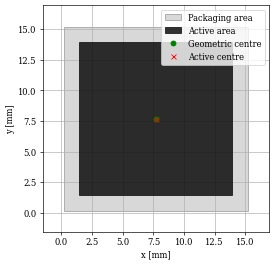

In [4]:
mppc = SiPMunit('quad')
mppc.print_properties()
mppc.plot_model()

Model: S13370-3050, "3x3", by Hamamatsu
Total unit area: 42.47 mm^2
Active area geometric correction: 1.00
Active area: 9.00 mm^2
Active area fraction: 0.21
Width tolerance: 0.15 mm
Height tolerance: 0.15 mm


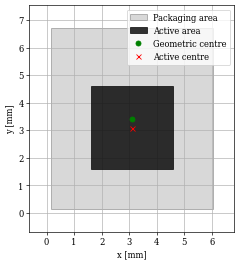

In [5]:
mppc = SiPMunit(model = '3x3')
mppc.print_properties()
mppc.plot_model()

## SiPM array

In [6]:
array = SiPMarray(array_diameter=100, border_margin=-10, sipm_model = 'quad')
array.print_properties()

Array diameter: 100 mm
Margin from the array edge: -10 mm
Number of units: 32
Total array area: 7853.98 mm^2
Total photosensor area: 7589.12 mm^2
Total SiPM active area: 4608.00 mm^2
SiPM coverage: 0.59


### Plot the array

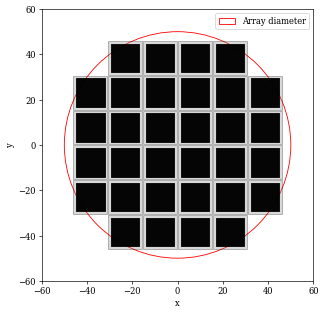

In [7]:
array.plot_sipm_array()

### Plot corners

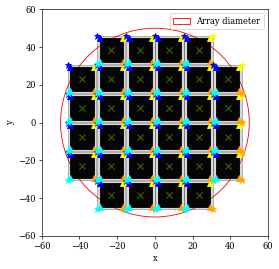

In [8]:
active_centres = array.get_centres()
geometric_centre = array.get_centres(active_area=False)

fig, ax = plt.subplots(1,1)
fig, ax = array.plot_sipm_array(figax= (fig,ax))

corners_active = array.get_corners_active()
corners_package = array.get_corners_package()

for centre_i in range(array.n_sipms):
    _x_active = active_centres[0,centre_i]
    _y_active = active_centres[1,centre_i]
    ax.plot(_x_active, _y_active, 'x', color = 'red', markersize = 8)

    _x_geometric = geometric_centre[0,centre_i]
    _y_geometric = geometric_centre[1,centre_i]
    ax.plot(_x_geometric, _y_geometric, 'x', color = 'green', markersize = 8)

    _ax_corner = corners_active[0,centre_i]
    _ay_corner = corners_active[1,centre_i]
    _bx_corner = corners_active[2,centre_i]
    _by_corner = corners_active[3,centre_i]
    _cx_corner = corners_active[4,centre_i]
    _cy_corner = corners_active[5,centre_i]
    _dx_corner = corners_active[6,centre_i]
    _dy_corner = corners_active[7,centre_i]

    ax.plot(_ax_corner, _ay_corner, '^', color = 'blue', markersize = 8)
    ax.plot(_bx_corner, _by_corner, '^', color = 'yellow', markersize = 8)
    ax.plot(_cx_corner, _cy_corner, '^', color = 'orange', markersize = 8)
    ax.plot(_dx_corner, _dy_corner, '^', color = 'cyan', markersize = 8)

    _ax_corner = corners_package[0,centre_i]
    _ay_corner = corners_package[1,centre_i]
    _bx_corner = corners_package[2,centre_i]
    _by_corner = corners_package[3,centre_i]
    _cx_corner = corners_package[4,centre_i]
    _cy_corner = corners_package[5,centre_i]
    _dx_corner = corners_package[6,centre_i]
    _dy_corner = corners_package[7,centre_i]

    ax.plot(_ax_corner, _ay_corner, '*', color = 'blue', markersize = 8)
    ax.plot(_bx_corner, _by_corner, '*', color = 'yellow', markersize = 8)
    ax.plot(_cx_corner, _cy_corner, '*', color = 'orange', markersize = 8)
    ax.plot(_dx_corner, _dy_corner, '*', color = 'cyan', markersize = 8)

#fig.savefig('test.pdf')
plt.show()

### Export the corners

In [9]:
array.export_corners_active(file_name='corners_active.csv')
array.export_corners_package(file_name='corners_package.csv')
array.export_centres(file_name = 'centres.csv')